# **Customer Churn Prediction**
Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame,<br>
We will use machine learning algorithm called logistic regression to predict this value by train the model in dataset of customers<br>
information with their churn value and then predict future churn value for future customers.<br>


### **Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("white")
import matplotlib.pyplot as plt
from pickle import dump
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold, cross_val_score
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### **Project Pipeline**
For any machine learning project it consist of three main phases as following :-
1. **Scoping :** List the problem description and project goals
2. **The Data :** Load, analyse and prepare the dataset for training
3. **The Model :** Create and train the model on the dataset

## **1 | Scoping**
The project problem is that we have a dataset containing customer properties and we will use machine learning techniques in order to determine a new customer churn value to figure out if the customer will stay or leave.

## **2 | The Data**
In this phase we will analyze and prepare the dataset before training by applying varoius steps as following :-
1. Data Loading
2. Data Visualization
3. Data Cleaning
4. Data Encoding
5. Data Scaling
6. Data Splitting

##### **1. Data Loading**
Load the dataset and show its info and statistics

In [2]:
# Load the dataset
dataset = pd.read_csv("dataset/churn.csv")
dataset.shape

(7043, 21)

In [3]:
# Show dataset head (first 5 records)
dataset.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Show dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Show dataset statistics
dataset.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


##### **2. Data Visualization**
Visualize dataset features frequencies to get some insights

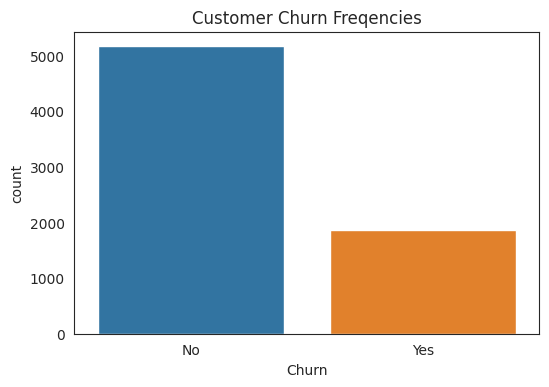

In [6]:
# Visualize customer churn frequenices
plt.figure(dpi=100)
sns.countplot(dataset['Churn'])
plt.title("Customer Churn Freqencies")
plt.show()

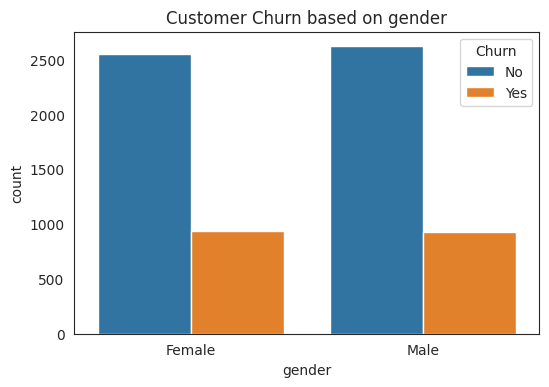

In [7]:
# Visualize the churn frequency for based on gender
plt.figure(dpi=100)
sns.countplot(x ='gender', hue='Churn', data=dataset)
plt.title("Customer Churn based on gender")
plt.show()

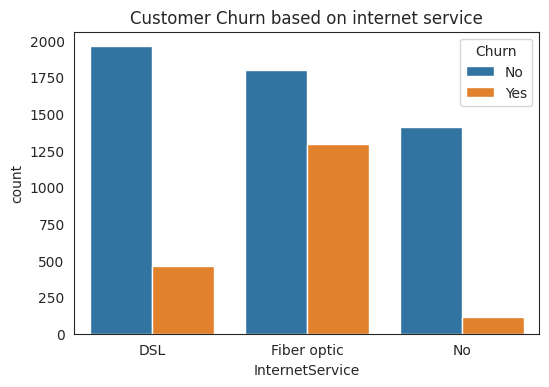

In [8]:
# Visualize the churn frequency for the internet service
plt.figure(dpi=100)
sns.countplot(x='InternetService', hue='Churn', data=dataset)
plt.title("Customer Churn based on internet service")
plt.show()

##### **3. Data Cleaning**
Drop unwanted fearures and handling missing values

In [9]:
# Drop cusomer ID feature
dataset = dataset.drop('customerID', axis=1)
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
# Check for missing values
dataset.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

##### **4. Data Encoding**
Encode categorical features to numerical 

In [11]:
# Encode all categorical features to numeric
le = LabelEncoder()
for column in dataset.columns:
  if dataset[column].dtype == int:
    continue
  dataset[column] = le.fit_transform(dataset[column])

# Save label encoder 
dump(le, open('models/encoder.pkl', 'wb'))

# Show dataset after encoding
dataset.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


##### **5. Data Scaling**
Scale large numerical features 

In [12]:
# Create features (X) and target (y)
X = dataset.drop('Churn', axis=1)
y = dataset['Churn']

#  Scale the features
sc = StandardScaler()
X = sc.fit_transform(X)

# Save the standered scaler
dump(sc, open('models/scaler.pkl','wb'))

##### **6. Data Splitting**
Split the dataset into training and testing sets

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. The Model**
In this phase we will create and train a logistic regression model 

In [14]:
# Model creation
model = LogisticRegression()

In [15]:
# Model training
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Model saving
dump(model, open("models/model.pkl", 'wb'))

In [17]:
# Model predictions on test set
y_pred = model.predict(X_test)

In [18]:
# Model Evaluation | Accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy * 100

81.40525195173882

In [19]:
# Model Evaluation | Classification report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.88      1036\n           1       0.68      0.57      0.62       373\n\n    accuracy                           0.81      1409\n   macro avg       0.76      0.74      0.75      1409\nweighted avg       0.81      0.81      0.81      1409\n'

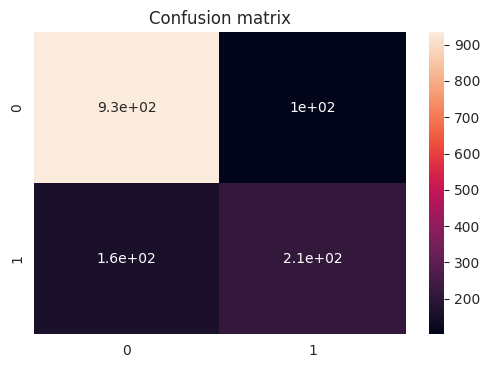

In [20]:
# Model Evaluation | Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(dpi=100)
sns.heatmap(cm, annot=True)
plt.title("Confusion matrix")
plt.show()